# Computer Simulation of Self Fertilization & Natural Selection
 ## By Haim Elbaz


 ## Problem Presentation
 
 In class we briefly discussed the negative consqeunces of inbreeding in regard to lethal mutations and alleles. Self fertilization is essentially the most extreme form of inbreeding.
 Intuitively, it seems that self fertilization cannot increase the mean fitness of a population. However, self fertilization is relatively abundant in plants, especially in crop & model plants. In these species, some part of the population reproduces by self fertilization as opposed to out-crossing. 
 
 How is that the case? Why was self-fertilization not lost during the evolution of these species? 
 Can it help favoring a genotype that otherwise would not be in favor?
 
 In other words - what is the relationship between natural selection and self fertilization? 

 ## Model
The model can be seen as constructed from two parts. The first part is the effect of self fertilization on genotype frequencies, and the second is the consideration of fitness in the self-fertilization population.

Allele frequencies are not changed by self fertilization, as will be deomnstrated, so they are not being taken into account. 


<u>Genotype Frequencies </u>

Assuming Hardy-Weinberg proportions, the following equations represent the change in genotype frequency in regard to self-fertilization, where <i>S</i> is the proportion of self-fertilization in the population and <i>T</i> is the complementary proportion of out-crossing. 

The alleles and their corresponding frequencies are <i>p</i> & <i>q</i> (<i>p</i> being the dominant allele) and <i>P</i>,<i>Q</i> are their corresponding homozygotes - <i>H</i> being the heterozygote genotype.


$$ P_1 = Tp^2_0 + S(P_0 + \frac{1}{4} H_0) :: (1.a) $$
$$ Q_1 = Tq^2_0 + S(Q_0 + \frac{1}{4} H_0) :: (1.b) $$
$$ H_1 = 2Tp_0 q_0 + \frac{1}{2}S H_0      :: (1.c) $$


<u>Natural Selection </u>

First, the notation being used for natural selection is relative fitness based, using dominance degree and selection coefficient <i>h</i>,<i>s</i> respectively, where <i>P</i> is the relatively fitter allele.

$$ \overline{w}_{P} = 1    :: (2.a) $$ 
$$ \overline{w}_{H} = 1-hs :: (2.b) $$ 
$$ \overline{w}_{Q} = 1-s  :: (2.c) $$ 

Since self-fertilization is a form of inbreeding, it is possible to use the equations for genotype fitness values under inbreeding. Since the inbreeding parameter, <i>f</i>, represends the proportion of inbreeding in the population, and the self-fertilization parameter, <i>S</i>, represents the proportion of self-fertilization, assuming that self-fertilization exists in the population but it is the only form of inbreeding that exists for that population, then we can represent that assumption as  <i>S = f</i>.

Accordingly, the mean fitness under no self-fertilization and under self-fertilization in degree <i>f</i> are: 

$$ \overline{w} = p^2 w_P + 2pqw_H + q^2 w_Q                :: (3.a)$$ 
$$ \overline{w}_{f} = \overline{w} + fpq(w_P -2 w_H + w_Q ) :: (3.b)$$ 

Combining equation sets 2 & 3, the extent in which inbreeding/selfing will reduce the mean fitness - termed as the inbreeding depression, the difference between them is:

$$ \overline{w} - \overline{w}_{f} = sfpq(1-2h):: (4)  $$ 

In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import random

## The Code
Definitions of two functions - both are the same model, one deterministic and shows the average result over infinite repeats, or the result of an infinite population. The second function is driven by random genetic drift.


In [3]:
# ========================================================================== #
# Deterministic function for self fertilization & natural selection
# ========================================================================== #

def det_self_fertilization_simulation(A1_frequency,A2_dominance_degree,
                                  selection_coefficient,self_fert_factor,
                                  population_size,no_of_generations):
    # Pointers
    p           = A1_frequency
    h           = A2_dominance_degree
    s           = selection_coefficient
    S           = self_fert_factor
    N           = population_size
    generations = range(no_of_generations)
    
    # Arithmetic parameters
    q = 1-p
    f = S         # Assuming all inbreeding is self fertilization 
    T = 1-S
    
    # Hardy-Weinberg genotype frequencies
    P0 = p**2
    Q0 = q**2
    H0 = 2*p*q
    
    # Natural selection parameters with regard to self fertilization
    w_11     = 1.0
    w_12     = 1-h*s
    w_22     = 1-s
    w_bar    = ((p**2*w_11)+(2*p*q*w_12)+(q**2*w_22))
    w_bar_f  = w_bar + f*p*q*(w_11+w_22-2*w_12)
    
    # Accounting for self fertilization 
    P1 = ((T*p**2+S*(P0+(0.25*H0)))*w_11)/w_bar
    Q1 = ((T*q**2+S*(Q0+(0.25*H0)))*w_22)/w_bar
    H1 = ((2*T*p*q+0.5*S*H0)*w_22)/w_bar
    
    #Creating lists for parameters + H-W check
    p_list, q_list, P1_list, Q1_list, H1_list, hwcheck = [],[],[],[],[],[]
    p_list.append(p)
    q_list.append(q)
    P1_list.append(P1)
    Q1_list.append(Q1)
    H1_list.append(H1)
    hwcheck.append(P1+H1+Q1)
    
    # Loop over generations
    for generation in generations:      
        # Creating new genotype frequencies and saving them, 
        # this time they depend on their previous value.
        P1 = ((T*p**2+S*(P1+(0.25*H1)))*w_11)/w_bar_f
        Q1 = ((T*q**2+S*(Q1+(0.25*H1)))*w_22)/w_bar_f
        H1 = ((2*T*p*q+0.5*S*H1)*w_22)/w_bar_f
        checksum = P1+H1+Q1
        P1 = P1/checksum
        Q1 = Q1/checksum
        H1 = H1/checksum
        p  = P1 + 0.5*H1
        q  = 1-p
        p_list.append(p)
        q_list.append(q)
        P1_list.append(P1)
        Q1_list.append(Q1)
        H1_list.append(H1)
        hwcheck.append(P1+H1+Q1)
        
    return P1_list, Q1_list, H1_list, p_list, q_list, hwcheck, generations

# ========================================================================== #
# Random function for self fertilization & natural selection
# ========================================================================== #

def rand_self_fertilization_simulation(A1_frequency,A2_dominance_degree,
                                  selection_coefficient,self_fert_factor,
                                  population_size,no_of_generations):
    # Pointers
    p           = A1_frequency
    h           = A2_dominance_degree
    s           = selection_coefficient
    S           = self_fert_factor
    N           = population_size
    generations = range(no_of_generations)
    
    # Arithmetic parameters
    q = 1-p
    f = S
    T = 1-S
    
    # Hardy-Weinberg genotype frequencies
    P0 = p**2
    Q0 = q**2
    H0 = 2*p*q
    
    # Natural selection parameters with regard to self fertilization
    w_11     = 1.0
    w_12     = 1-h*s
    w_22     = 1-s
    w_bar    = ((p**2*w_11)+(2*p*q*w_12)+(q**2*w_22))
    w_bar_f  = w_bar + f*p*q*(w_11+w_22-2*w_12)
    
    # Accounting for self fertilization 
    P1 = ((T*p**2+S*(P0+(0.25*H0)))*w_11)/w_bar
    Q1 = ((T*q**2+S*(Q0+(0.25*H0)))*w_22)/w_bar
    H1 = ((2*T*p*q+0.5*S*H0)*w_22)/w_bar
    
    #Creating lists for parameters
    p_list, q_list, P1_list, Q1_list, H1_list, hwcheck = [],[],[],[],[],[]
    p_list.append(p)
    q_list.append(q)
    P1_list.append(P1)
    Q1_list.append(Q1)
    H1_list.append(H1)
    hwcheck.append(P1+H1+Q1)
    
    # Loop over generations, pick random gametes each generation, 
    # calculate new frequencies. 
    for generation in generations:
         p_copies = 0
         q_copies = 0
         for gamete in range(2*N):
             if random.random() < p:
                 p_copies += 1
             else:
                 q_copies += 1 
                
        # Creating new allele frequencies and saving them
         p = p_copies/(2*N)
         q = 1-p
         p_list.append(p)
         q_list.append(q)
             
        # Creating new genotype frequencies and saving them, 
        # this time depends on their previous value.
         P1 = ((T*p**2+S*(P1+(0.25*H1)))*w_11)/w_bar_f
         Q1 = ((T*q**2+S*(Q1+(0.25*H1)))*w_22)/w_bar_f
         H1 = ((2*T*p*q+0.5*S*H1)*w_22)/w_bar_f
         checksum = P1+H1+Q1
         P1 = P1/checksum
         Q1 = Q1/checksum
         H1 = H1/checksum
         P1_list.append(P1)
         Q1_list.append(Q1)
         H1_list.append(H1)
         hwcheck.append(P1+H1+Q1)
        
    return P1_list, Q1_list, H1_list, p_list, q_list, hwcheck, generations

## Results


## Effect of selection coefficient on genotype frequencies with selfing

First, lets test the model for the effect of self-fertilization with only and with no natural selection. For this purpuse, we will set the selection coefficient to 0.0 and neutralize the effect of outcrossing by setting the selfing factor to 1.0.  

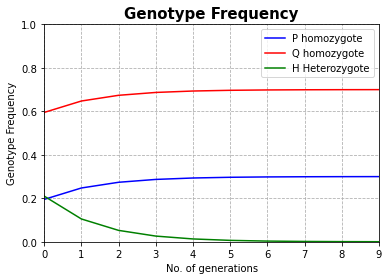

In [26]:
# Selfing only

P1_list, Q1_list, H1_list, p_list, q_list, hwcheck, generations = det_self_fertilization_simulation(
        A1_frequency          = 0.3,
        A2_dominance_degree   = 0.0,
        selection_coefficient = 0.0,
        self_fert_factor      = 1.0,
        population_size       = 50,
        no_of_generations     = 10)

# Plot
fig, ax = plt.subplots()
plt.plot(generations, P1_list[:-1], label = 'P homozygote', color = 'blue')
plt.plot(generations, Q1_list[:-1], label = 'Q homozygote', color = 'red')
plt.plot(generations, H1_list[:-1], label = 'H Heterozygote', color = 'green')
plt.title('Genotype Frequency' , fontdict = {'fontsize': 15, 'fontweight' : 600})
plt.xlabel('No. of generations' , fontdict = {'fontsize': 10, 'fontweight' : 400})
plt.ylabel('Genotype Frequency', fontdict = {'fontsize': 10, 'fontweight' : 400})
ax.set_ylim([0,1.0])
ax.set_xlim([0,generations[-1]])
ax.grid(axis='y', linestyle= '--')
ax.grid(axis='x', linestyle= '--')
ax.set_xticks(generations)
ax.legend()
plt.show()


We can see that the proportions of the homozygotes P&Q have risen to the exact extent in which the heterozygote declined. Eventually, they both reach equilibrium where the homozygote frequency exactly equals its respective allele frequency (P=p, Q=q, H=0). 

With any degree of partial self-fertilization (S<1.0, testing S = 0.9):

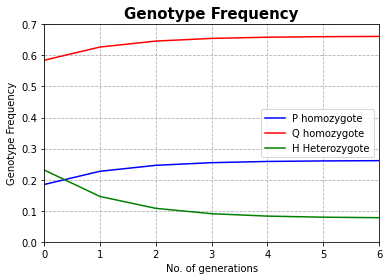

In [5]:
# Recreating figure 8.11 from 'Genetics of Populations' by P.W. Hendrick, p. 460

P1_list, Q1_list, H1_list, p_list, q_list, hwcheck, generations = det_self_fertilization_simulation(
        A1_frequency          = 0.3,
        A2_dominance_degree   = 0.0,
        selection_coefficient = 0.0,
        self_fert_factor      = 0.9,
        population_size       = 50,
        no_of_generations     = 7)
# Plot
fig, ax = plt.subplots()
plt.plot(generations, P1_list[:-1], label = 'P homozygote', color = 'blue')
plt.plot(generations, Q1_list[:-1], label = 'Q homozygote', color = 'red')
plt.plot(generations, H1_list[:-1], label = 'H Heterozygote', color = 'green')
plt.title('Genotype Frequency' , fontdict = {'fontsize': 15, 'fontweight' : 600})
plt.xlabel('No. of generations' , fontdict = {'fontsize': 10, 'fontweight' : 400})
plt.ylabel('Genotype Frequency', fontdict = {'fontsize': 10, 'fontweight' : 400})
ax.set_ylim([0,0.7])
ax.set_xlim([0,generations[-1]])
ax.grid(axis='y', linestyle= '--')
ax.grid(axis='x', linestyle= '--')
ax.set_xticks(generations)
ax.legend()
plt.show()


Heterozygosity does not reach zero in equilibrium because some degree of outcrossing exist in the population.



Lets consider the effect of selection and dominance degrees in continuation to the previous example.

Comparing the results for various degrees of selfing where P is slightly advantageous over Q (s = 0.2) and the heterozygote H is exactly in the middle (h = 0.5):

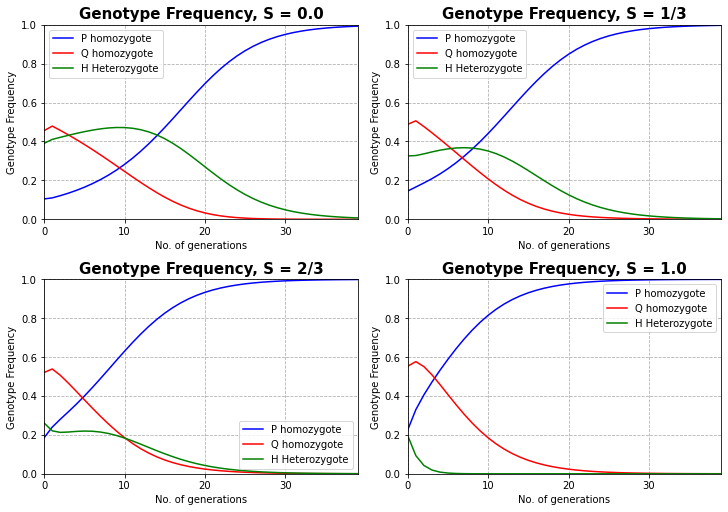

In [29]:
P1_list, Q1_list, H1_list, p_list, q_list, hwcheck, generations = det_self_fertilization_simulation(
        A1_frequency          = 0.3,
        A2_dominance_degree   = 0.5,
        selection_coefficient = 0.2,
        self_fert_factor      = 0.0,
        population_size       = 50,
        no_of_generations     = 40)

# Plot
fig, ax = plt.subplots(2,2, figsize=(10,7), constrained_layout=True)
ax[0,0].plot(generations, P1_list[:-1], label = 'P homozygote', color = 'blue')
ax[0,0].plot(generations, Q1_list[:-1], label = 'Q homozygote', color = 'red')
ax[0,0].plot(generations, H1_list[:-1], label = 'H Heterozygote', color = 'green')
ax[0,0].set_title('Genotype Frequency, S = 0.0' , fontdict = {'fontsize': 15, 'fontweight' : 600})
ax[0,0].set_xlabel('No. of generations' , fontdict = {'fontsize': 10, 'fontweight' : 400})
ax[0,0].set_ylabel('Genotype Frequency', fontdict = {'fontsize': 10, 'fontweight' : 400})
ax[0,0].set_ylim([0,1.0])
ax[0,0].set_xlim([0,generations[-1]])
ax[0,0].grid(axis='y', linestyle= '--')
ax[0,0].grid(axis='x', linestyle= '--')
ax[0,0].set_xticks(generations[::10])
ax[0,0].legend()

P1_list, Q1_list, H1_list, p_list, q_list, hwcheck, generations = det_self_fertilization_simulation(
        A1_frequency          = 0.3,
        A2_dominance_degree   = 0.5,
        selection_coefficient = 0.2,
        self_fert_factor      = 0.333,
        population_size       = 50,
        no_of_generations     = 40)

# Plot
ax[0,1].plot(generations, P1_list[:-1], label = 'P homozygote', color = 'blue')
ax[0,1].plot(generations, Q1_list[:-1], label = 'Q homozygote', color = 'red')
ax[0,1].plot(generations, H1_list[:-1], label = 'H Heterozygote', color = 'green')
ax[0,1].set_title('Genotype Frequency, S = 1/3' , fontdict = {'fontsize': 15, 'fontweight' : 600})
ax[0,1].set_xlabel('No. of generations' , fontdict = {'fontsize': 10, 'fontweight' : 400})
ax[0,1].set_ylabel('Genotype Frequency', fontdict = {'fontsize': 10, 'fontweight' : 400})
ax[0,1].set_ylim([0,1.0])
ax[0,1].set_xlim([0,generations[-1]])
ax[0,1].grid(axis='y', linestyle= '--')
ax[0,1].grid(axis='x', linestyle= '--')
ax[0,1].set_xticks(generations[::10])
ax[0,1].legend()

P1_list, Q1_list, H1_list, p_list, q_list, hwcheck, generations = det_self_fertilization_simulation(
        A1_frequency          = 0.3,
        A2_dominance_degree   = 0.5,
        selection_coefficient = 0.2,
        self_fert_factor      = 0.666,
        population_size       = 50,
        no_of_generations     = 40)

# Plot
ax[1,0].plot(generations, P1_list[:-1], label = 'P homozygote', color = 'blue')
ax[1,0].plot(generations, Q1_list[:-1], label = 'Q homozygote', color = 'red')
ax[1,0].plot(generations, H1_list[:-1], label = 'H Heterozygote', color = 'green')
ax[1,0].set_title('Genotype Frequency, S = 2/3' , fontdict = {'fontsize': 15, 'fontweight' : 600})
ax[1,0].set_xlabel('No. of generations' , fontdict = {'fontsize': 10, 'fontweight' : 400})
ax[1,0].set_ylabel('Genotype Frequency', fontdict = {'fontsize': 10, 'fontweight' : 400})
ax[1,0].set_ylim([0,1.0])
ax[1,0].set_xlim([0,generations[-1]])
ax[1,0].grid(axis='y', linestyle= '--')
ax[1,0].grid(axis='x', linestyle= '--')
ax[1,0].set_xticks(generations[::10])
ax[1,0].legend()

P1_list, Q1_list, H1_list, p_list, q_list, hwcheck, generations = det_self_fertilization_simulation(
        A1_frequency          = 0.3,
        A2_dominance_degree   = 0.5,
        selection_coefficient = 0.2,
        self_fert_factor      = 1.0,
        population_size       = 50,
        no_of_generations     = 40)


# Plot
ax[1,1].plot(generations, P1_list[:-1], label = 'P homozygote', color = 'blue')
ax[1,1].plot(generations, Q1_list[:-1], label = 'Q homozygote', color = 'red')
ax[1,1].plot(generations, H1_list[:-1], label = 'H Heterozygote', color = 'green')
ax[1,1].set_title('Genotype Frequency, S = 1.0' , fontdict = {'fontsize': 15, 'fontweight' : 600})
ax[1,1].set_xlabel('No. of generations' , fontdict = {'fontsize': 10, 'fontweight' : 400})
ax[1,1].set_ylabel('Genotype Frequency', fontdict = {'fontsize': 10, 'fontweight' : 400})
ax[1,1].set_ylim([0,1.0])
ax[1,1].set_xlim([0,generations[-1]])
ax[1,1].grid(axis='y', linestyle= '--')
ax[1,1].grid(axis='x', linestyle= '--')
ax[1,1].set_xticks(generations[::10])
ax[1,1].legend()


plt.show()

Since the q allele is harmful, it is expected that p will fixate, even that it started as the lower frequency allele and even without selfing. However, we can see that the introduction of selfing into this system have caused fixation to happen earlier (in terms of generations), and also caused the heterozygote population to decline much faster. The more prevalent self-fertilization is, the faster the population declines and heterozygosity declines.

As expected, heterozygosity has lowered dramatically. After several generations of self fertilization, it seems that P is more likely to fix, or to be the more common genotype in the population. 

## Summary

## (Sidenote) Inbreeding & self fertilization affects only genotype frequencies, not allele frequencies - demonstration

As demonstrated in the cell below, allele frequencies are neutral to self fertilization and the graph of allele frequencies over time behaves the same over different self fertilization factors.
The chances of fixation/loss and effect of genetic drift are dependent on allele frequency alone.

In [ ]:
# Plotting multiple repeats of p in random drift with 100% inbreeding, no selection
fig, ax = plt.subplots()
repeats = range(5)
for repeat in repeats:
    P1_list, Q1_list, H1_list, p_list, q_list, hwcheck, generations = rand_self_fertilization_simulation(
        A1_frequency          = 0.5,
        A2_dominance_degree   = 0.0,
        selection_coefficient = 0.0,
        self_fert_factor      = 0.0,
        population_size       = 50,
        no_of_generations     = 250)
    
    plt.plot(generations, p_list[:-1])
    
plt.title('p Allele Frequency, '+str(len(repeats))+' Repeats' , fontdict = {'fontsize': 15, 'fontweight' : 600})
plt.xlabel('No. of generations')
plt.ylabel('Allele Frequency')
ax.set_ylim([0,1])
ax.set_xlim([0,generations[-1]])
ax.grid(axis='y', linestyle= '--')
ax.grid(axis='x', linestyle= '--')
ax.set_xticks(generations[::50])
plt.show()